In [1]:
using PyPlot

In [2]:
function load_datas(fnames)
    data_dict = Dict{Float64,Vector{Float64}}()
    for fname in fnames
        data = readcsv(fname, Float64, skipstart=1)
        for i in 1:size(data, 1)
            freq = data[i, 1]
            frame = if freq in keys(data_dict)
                data_dict[freq]
            else
                data_dict[freq] = zeros(2)
            end
            frame[1] += data[i, 3]
            frame[2] += data[i, 4]
        end
    end
    freqs = sort(collect(keys(data_dict)))
    len = length(freqs)
    ratios = Vector{Float64}(len)
    uncs = Vector{Float64}(len)
    for i in 1:len
        frame = data_dict[freqs[i]]
        ratios[i] = frame[2] / frame[1]
        uncs[i] = √(frame[2]) / frame[1]
    end
    freqs, ratios, uncs
end

load_datas (generic function with 1 method)

In [3]:
fnames = map(x->joinpath("data/", x), filter(x->endswith(x, ".csv"), readdir("data/")))

4-element Array{ASCIIString,1}:
 "data/data_20160226_170704.csv"
 "data/data_20160226_183225.csv"
 "data/data_20160226_193116.csv"
 "data/data_20160226_201925.csv"

In [4]:
freqs, ratios, uncs = load_datas(fnames)

([-1.86e7,-1.85925e7,-1.8585e7,-1.85775e7,-1.857e7,-1.85625e7,-1.8555e7,-1.85475e7,-1.854e7,-1.85325e7  …  -1.80675e7,-1.806e7,-1.80525e7,-1.8045e7,-1.80375e7,-1.803e7,-1.80225e7,-1.8015e7,-1.80075e7,-1.8e7],[0.0689655,0.111111,0.0,0.0769231,0.111111,0.0357143,0.333333,0.16129,0.125,0.258065  …  0.285714,0.229167,0.318182,0.136364,0.2,0.170732,0.146341,0.121951,0.125,0.0588235],[0.048766,0.0555556,0.0,0.0543928,0.06415,0.0357143,0.111111,0.0721312,0.0625,0.0912396  …  0.0903508,0.0690963,0.0850377,0.0556702,0.0755929,0.0645305,0.0597437,0.0545382,0.0559017,0.0415945])

 in depwarn(::ASCIIString, ::Symbol) at ./deprecated.jl:64
 in readall(::IOStream, ::Vararg{IOStream}) at ./deprecated.jl:30
 in npyinitialize() at /usr/share/julia/site/v0.5/PyCall/src/numpy.jl:75
 in PyCall.PyObject(::Array{Float64,1}) at /usr/share/julia/site/v0.5/PyCall/src/numpy.jl:180
 in map(::Type{PyCall.PyObject}, ::Tuple{LinSpace{Float64},Array{Float64,1}}) at ./tuple.jl:73
 in #pycall#32(::Array{Any,1}, ::Any, ::PyCall.PyObject, ::Type{PyCall.PyAny}, ::LinSpace{Float64}, ::Vararg{Any}) at /usr/share/julia/site/v0.5/PyCall/src/PyCall.jl:344
 [inlined code] from ./boot.jl:331
 in #plot#83(::Array{Any,1}, ::Any, ::LinSpace{Float64}, ::Vararg{Any}) at /usr/share/julia/site/v0.5/PyPlot/src/PyPlot.jl:480
 [inlined code] from ./essentials.jl:78
 in include_string(::UTF8String, ::ASCIIString) at ./loading.jl:371
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /usr/share/julia/site/v0.5/IJulia/src/execute_request.jl:182
 [inlined code] from ./dict.jl:752
 in eventloop(:

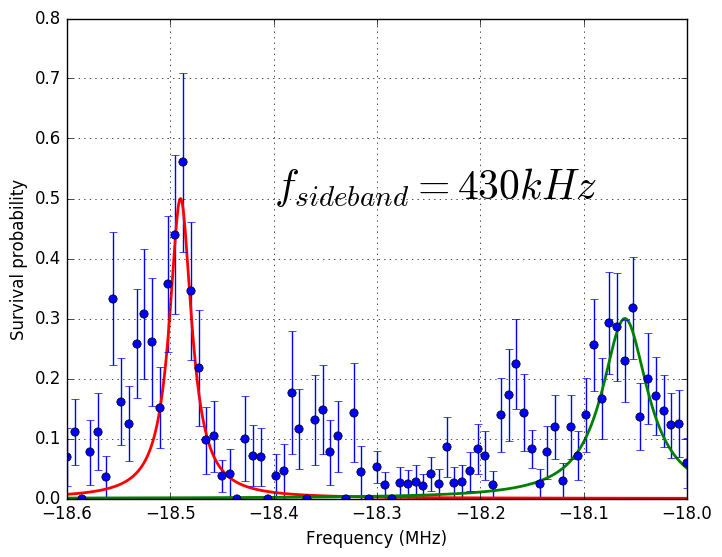

In [5]:
plotfreqs = linspace(minimum(freqs), maximum(freqs), 1000) / 1e6
fitfun(x, x₀, amp, σ) = amp ./ (1 + (x - x₀).^2 ./ σ^2)
plot(plotfreqs, fitfun(plotfreqs, -18.49, 0.5, 0.013), color="r", linewidth="2")
plot(plotfreqs, fitfun(plotfreqs, -18.06, 0.3, 0.027), color="g", linewidth="2")
errorbar(freqs / 1e6, ratios, uncs, fmt="bo")
grid()
xlabel("Frequency (MHz)")
ylabel("Survival probability")
xlim([minimum(freqs), maximum(freqs)] / 1e6)
text(-18.4, 0.5, "\$f_{sideband}=430kHz\$", fontsize=30)
savefig("img/plot_combined.png", bbox_inches="tight")